# Preprocessing

import pandas as pd
import networkx as nx
import tweepy
import csv
import datetime as dt
import time
from datetime import date

In [ ]:
# df_vaksin= pd.read_csv('https://github.com/nanahsn/AJS/blob/main/vaksin.csv?raw=true')
# training_set = df_vaksin.iloc[:,1:2].values

file_path = "twitter_dataset.csv"

df_vaksin= pd.read_csv('https://github.com/nanahsn/AJS/blob/main/dataset_vaksin.csv?raw=true')
training_set = df_vaksin.iloc[:,1:2].values

In [ ]:
df_vaksin.drop_duplicates(keep=False, inplace=True)
df_vaksin

,id,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,source
0,1.35E+18,1/10/2021 16:14,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,5/6/2014 2:08,4617.0,203.0,38,Twitter for iPhone
1,1.35E+18,1/10/2021 16:33,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,11/25/2020 3:24,10.0,22.0,38,Twitter Web App
2,1.35E+18,1/11/2021 0:24,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,NaN,NaN,NaN,NaN,NaN
3,1.35E+18,1/11/2021 0:30,Dua Lagi Obat yang Dapat Selamatkan Nyawa Pasi...,"['Infus', 'Virus', 'Wabah', 'Radang', 'Vaksin']",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,NaN,NaN,NaN,NaN,NaN
4,1.35E+18,1/11/2021 1:00,"Vaksin buatan Tiongkok kembali dipertanyakan, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
288,1.35E+18,1/12/2021 16:01,... SIAP VAKSIN .. #vaksin #siapvaksincovid19 ...,"['vaksin', 'siapvaksincovid19']",Eka Sulistiyana,Blitar Gunungkidul,"Lecturer, Entrepreneur",NaN,NaN,NaN,NaN,NaN
296,1.35E+18,1/12/2021 16:08,Vaksinasi untuk Indonesia bebas dari pandemi. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,1.35E+18,1/12/2021 16:36,Jadilah Pelopor VACCINE Covid-19 #Vaksin #Vaks...,"['Vaksin', 'VaksinSinovac', 'vaksinuntukkita',...",rOelex,"-3.680613,128.209951. Ambon",Profesional Internal Auditor. Freelance Fotogr...,3/8/2011 9:52,59.0,155.0,524,Twitter for iPhone
304,1.35E+18,1/12/2021 16:39,"Vaksin, Bisnis atau Solusi Pandemi? https://t....","['Vaksin', 'Bisnis', 'Pandemi', 'Sinovac']",SUARAISLAM.ID,"DKI Jakarta, Indonesia",Akun Twitter Suara Islam Online,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_vaksin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 305
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                293 non-null    object 
 1   date              292 non-null    object 
 2   text              292 non-null    object 
 3   hashtags          113 non-null    object 
 4   user_name         199 non-null    object 
 5   user_location     116 non-null    object 
 6   user_description  168 non-null    object 
 7   user_created      149 non-null    object 
 8   user_followers    149 non-null    float64
 9   user_friends      140 non-null    float64
 10  user_favourites   148 non-null    object 
 11  source            149 non-null    object 
dtypes: float64(2), object(10)
memory usage: 29.8+ KB


# Create Graph

In [ ]:
graphvac = nx.Graph()
for index, row in df_vaksin.iterrows():
    graphvac.add_edge(row['user_name'], row['text'])

In [ ]:
for i, elrow in df_vaksin.iterrows():
    graphvac.add_edge(elrow[0], elrow[1])

In [ ]:
def calculate_degree(graphvac,n):
    arr_Degree = []
    arr_Node= []
    for node in graphvac.nodes():
        temp = graphvac.degree(node)
        if temp >= n : arr_Degree.append(temp),arr_Node.append(node)

    return arr_Degree,arr_Node

In [ ]:
vaccDegree, vaccNode = calculate_degree(graphvac,0)

In [ ]:
print(graphvac)

Graph with 632 nodes and 511 edges


In [ ]:
data = {'Node' : vaccNode,
        'Degree' : vaccDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree

,Node,Degree
0,DiskominfoKotaBogor,1
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,1
2,Indah Nur Hidayah,1
3,Sistem satu data mendukung Vaksinasi di Indone...,1
4,BaBe - Baca Berita,18
...,...,...
627,1/12/2021 16:01,1
628,1/12/2021 16:08,1
629,1/12/2021 16:36,1
630,1/12/2021 16:39,1


#Community Layout

In [ ]:
from networkx.algorithms.community.kclique import k_clique_communities

In [ ]:
# create clique communities
communities = list(k_clique_communities(graphvac, 8))

In [ ]:
pos = nx.spring_layout(graphvac)
colors = ["blue","green"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(df_vaksin, pos, nodelist=node_list, node_color=colors[i%10], node_size=50, alpha=1)

In [ ]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
dict_communities = {}

for i, c in enumerate(communities):
    for node in c:
        dict_communities[node] = i + 1

for node in graphvac:
    if node not in dict_communities.keys():
        dict_communities[node] = -1

In [ ]:
pos = community_layout(graphvac, dict_communities)

In [ ]:
from matplotlib import cm
colors = []
for node in graphvac.nodes:
    colors.append(cm.Set1(dict_communities[node]))

In [ ]:
import matplotlib.pyplot as plt

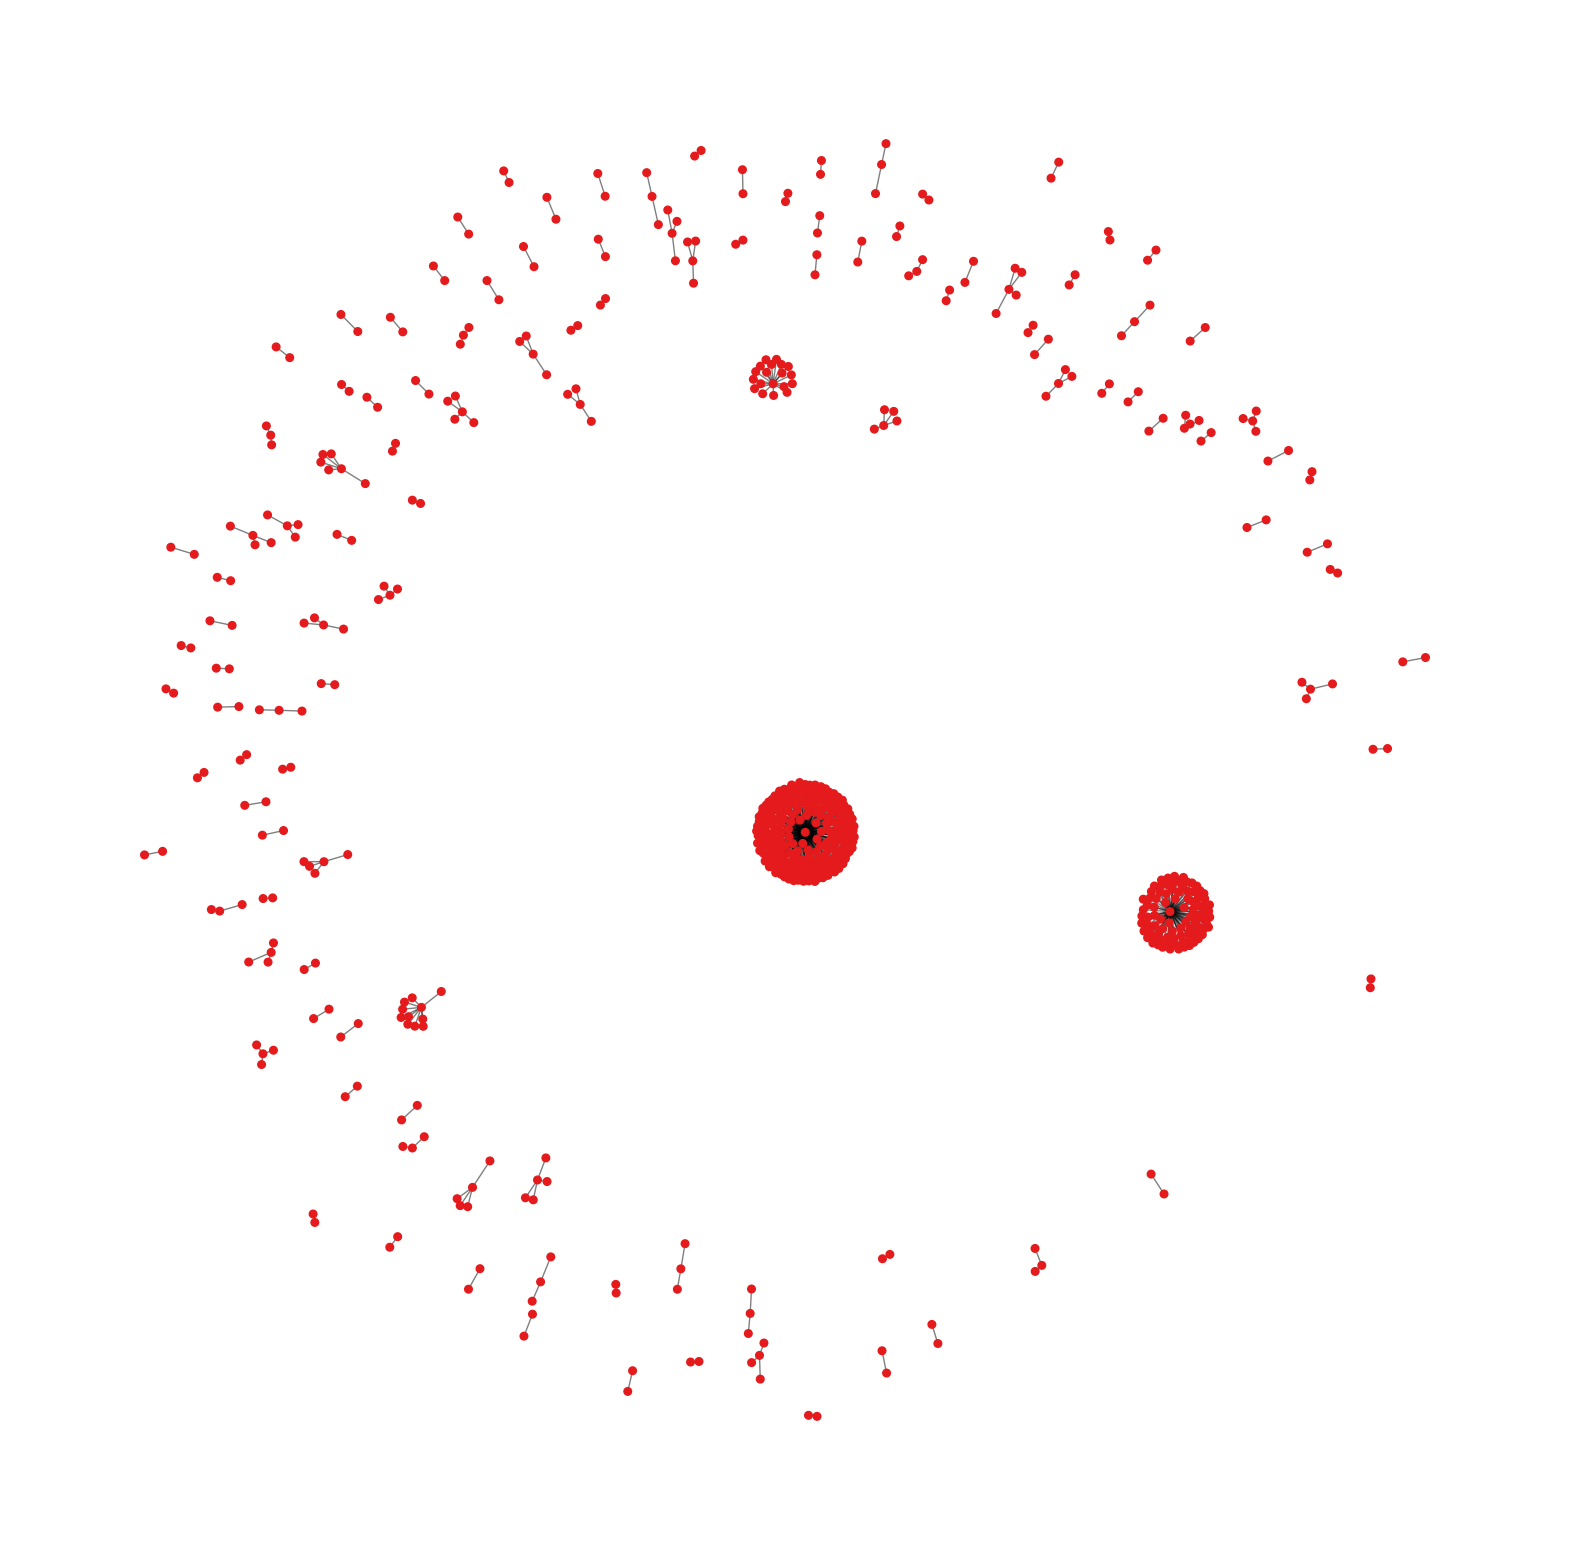

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(graphvac, pos, node_color=colors, node_size=30)
nx.draw_networkx_edges(graphvac, pos, alpha=0.5)
plt.axis('off')
plt.show()

# GIRVAN NEWMAN

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
from random import random
import matplotlib.pyplot as plt

In [ ]:
from networkx import edge_betweenness_centrality

def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

In [ ]:
gn_generator = girvan_newman(graphvac, most_valuable_edge)

In [ ]:
from itertools import islice
gn_communities = next(islice(gn_generator, 3, None)) # Do 3 iterations only

In [ ]:
gn_dict_communities = {}

for i, c in enumerate(gn_communities):
    print ("Community {}".format(i))
    for node in c:
        gn_dict_communities[node] = i + 1

for node in graphvac:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1

Community 0
Community 1
Community 2
Community 3
Community 4
Community 5
Community 6
Community 7
Community 8
Community 9
Community 10
Community 11
Community 12
Community 13
Community 14
Community 15
Community 16
Community 17
Community 18
Community 19
Community 20
Community 21
Community 22
Community 23
Community 24
Community 25
Community 26
Community 27
Community 28
Community 29
Community 30
Community 31
Community 32
Community 33
Community 34
Community 35
Community 36
Community 37
Community 38
Community 39
Community 40
Community 41
Community 42
Community 43
Community 44
Community 45
Community 46
Community 47
Community 48
Community 49
Community 50
Community 51
Community 52
Community 53
Community 54
Community 55
Community 56
Community 57
Community 58
Community 59
Community 60
Community 61
Community 62
Community 63
Community 64
Community 65
Community 66
Community 67
Community 68
Community 69
Community 70
Community 71
Community 72
Community 73
Community 74
Community 75
Community 76
Community

In [ ]:
gn_pos = community_layout(graphvac, gn_dict_communities)
gn_pos


{'DiskominfoKotaBogor': array([ 3.87519839, -0.06146835]),
 'Tak Kenal maka Tak Kebal. Vaksin menjadi bukti manusia berjuang menjaga eksistensinya di dunia ini. Vaksin juga men? https://t.co/tQ97R12mXs': array([1.87519839, 1.82185416]),
 'Indah Nur Hidayah': array([1.46732944, 3.12486433]),
 'Sistem satu data mendukung Vaksinasi di Indonesia #Vaksin #Covid19 #CoronaVirus #Kesehatan https://t.co/gqyLHMdhOh': array([-0.53267056,  2.53170524]),
 'BaBe - Baca Berita': array([-2.07713509,  1.5803859 ]),
 'Apa Perbedaan Vaksin China Sinovac dan Sinopharm serta Merek Lain? #Vaksin #Perusahaanfarmasi #Virus #Farmasi? https://t.co/rJ2Ltk3vGz': array([-1.50299437,  1.73134951]),
 'Dua Lagi Obat yang Dapat Selamatkan Nyawa Pasien COVID-19 Ditemukan #Infus #Virus #Wabah #Radang #Vaksin? https://t.co/QKrbcMVHwn': array([-1.71613343,  0.76632289]),
 nan: array([-2.73124279, -0.11379195]),
 'Vaksin buatan Tiongkok kembali dipertanyakan, orang tua tidak boleh suntik!': array([-2.94716109, -1.10009965]

In [ ]:
from matplotlib import cm
gn_colors = []
for node in graphvac.nodes:
    gn_colors.append(cm.Set1(gn_dict_communities[node]))

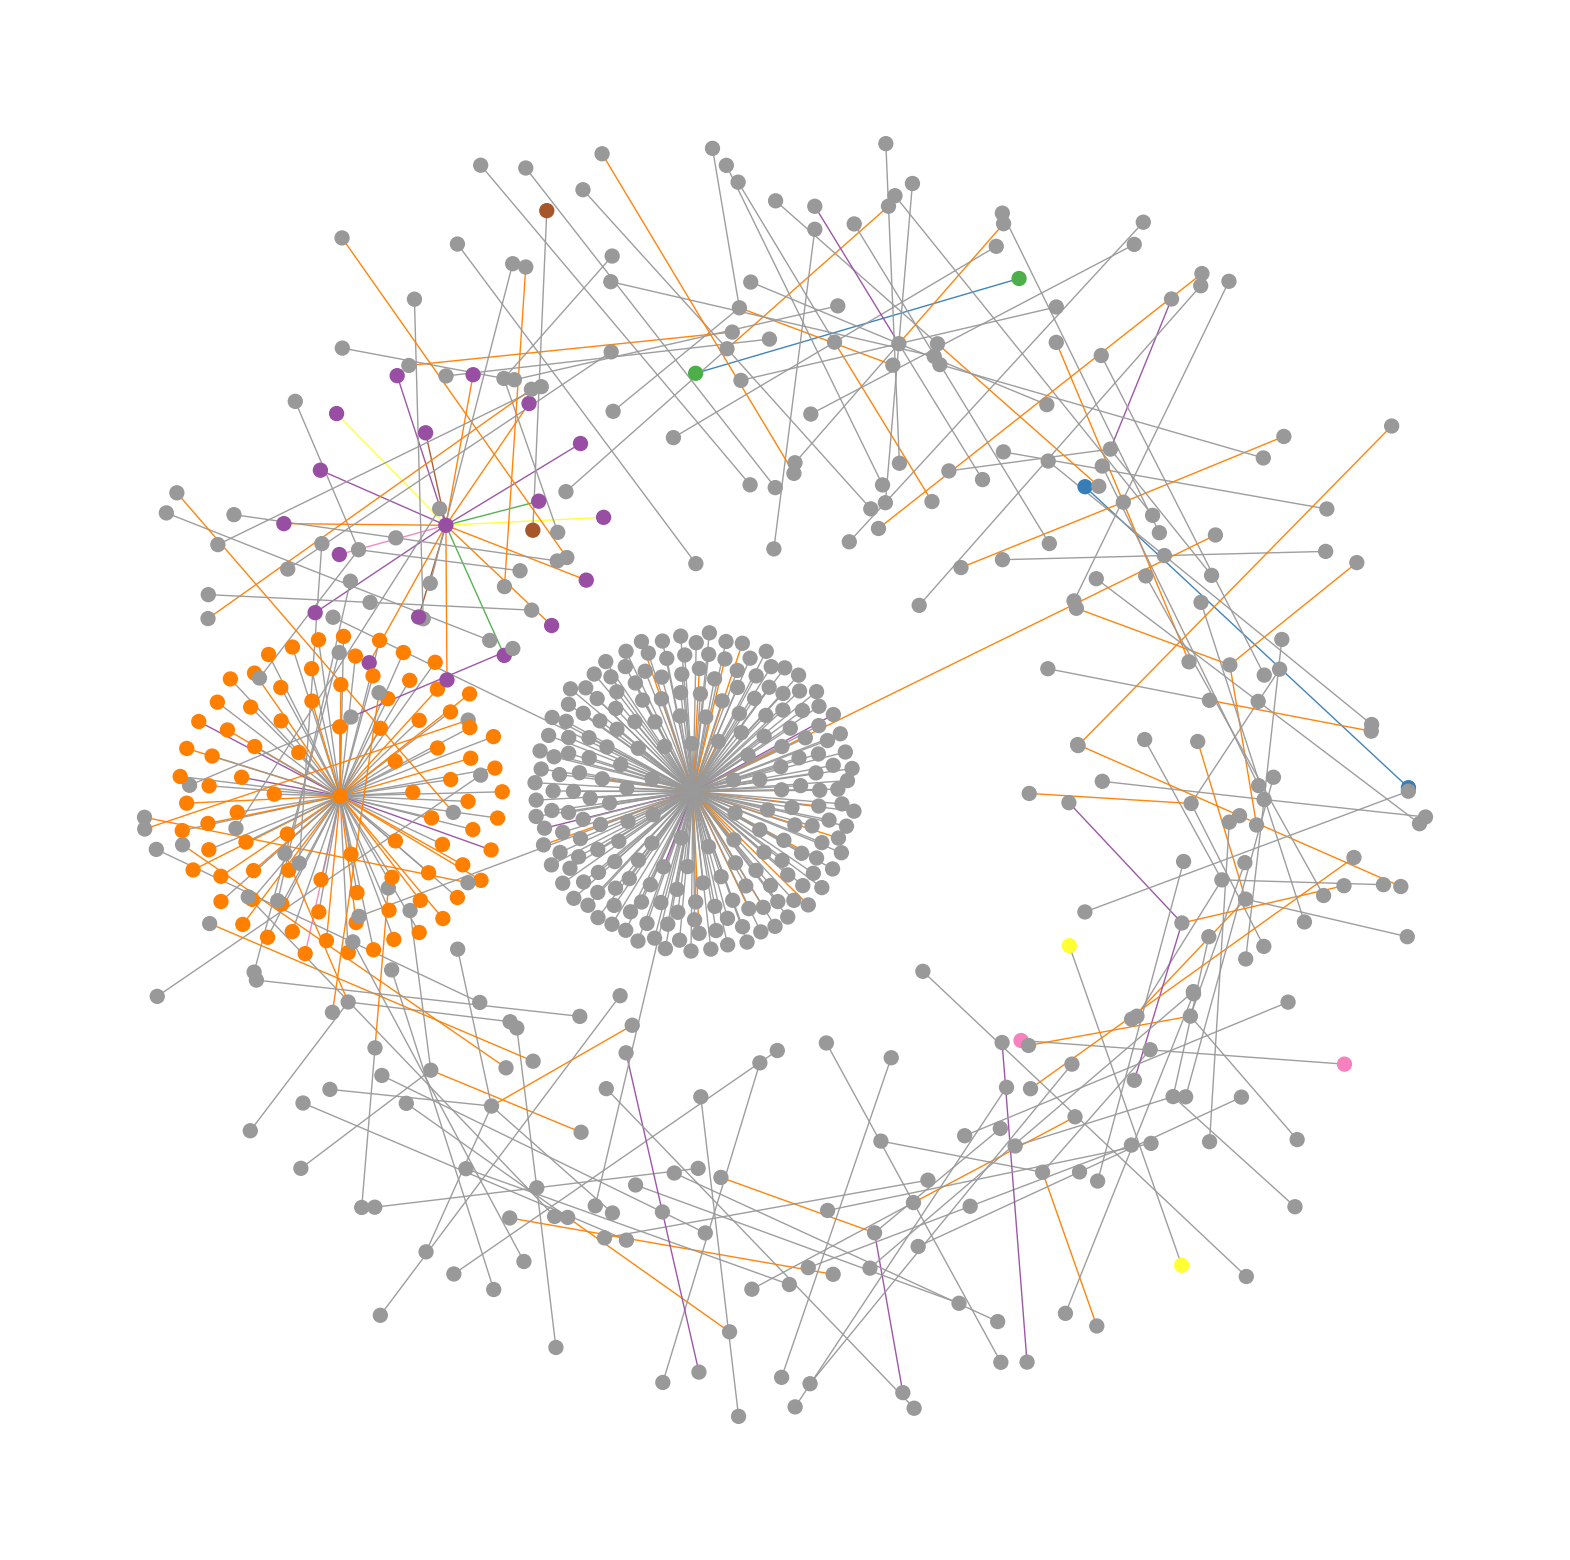

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(graphvac, gn_pos, node_color=gn_colors, node_size=100)
nx.draw_networkx_edges(graphvac, gn_pos, edge_color=gn_colors, alpha=0.95)
plt.axis('off')
plt.show()

# Analisis Hasil Penelitian

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

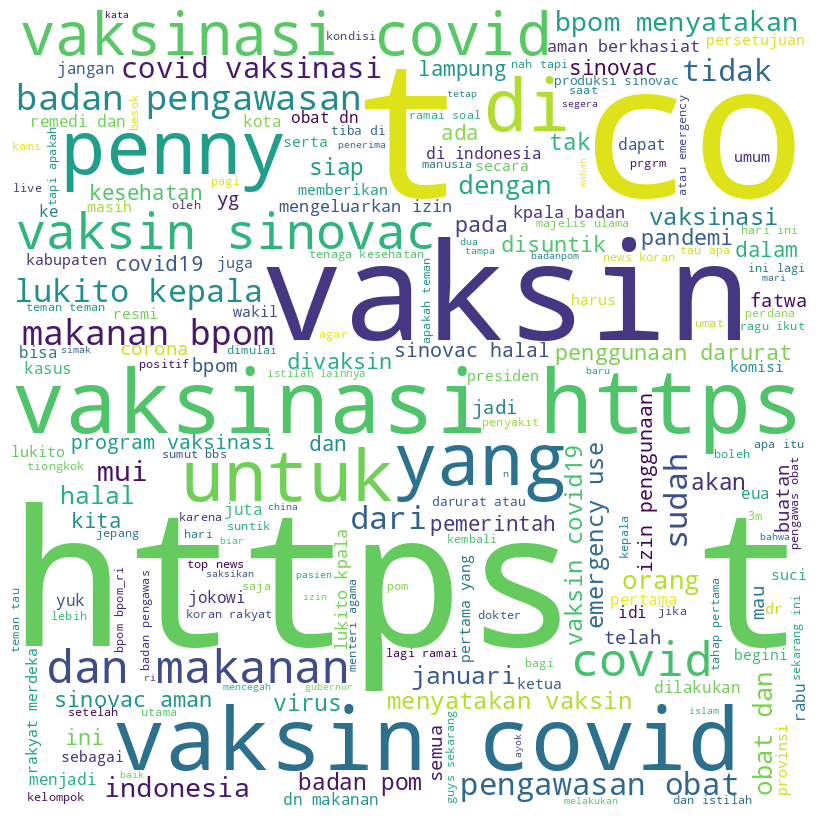

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_vaksin.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()